In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **Importing the necessary libraries.**

In [2]:
#Importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sn

# **Loading the dataset.**

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

# **EDA**

****Getting basic infos on the datasets using pandas functions****

In [4]:
from IPython.display import display
display(train.describe())
display(train.head())
display(train.info())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [5]:
display(test.describe())
display(test.head())
display(test.info())

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

# **DATA CLEANING**

In [6]:
for dataset in [train, test]:
    # Calculate the median age for each Pclass
    median_ages = dataset.groupby('Pclass')['Age'].median()

    # Fill missing Age values with the median age of the corresponding Pclass
    for pclass in range(1, 4):  # Assuming Pclass values are 1, 2, 3
        mask = (dataset['Age'].isnull()) & (dataset['Pclass'] == pclass)
        dataset.loc[mask, 'Age'] = median_ages[pclass]

# Fill missing Embarked values
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

In [7]:
# Extract titles from 'Name'
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Create a new feature 'FamilySize'
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

# Inspect the first few rows to verify
print(train[['Name', 'Title', 'FamilySize']].head())

                                                Name Title  FamilySize
0                            Braund, Mr. Owen Harris    Mr           2
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs           2
2                             Heikkinen, Miss. Laina  Miss           1
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs           2
4                           Allen, Mr. William Henry    Mr           1


In [8]:
#Dropping the cabin column since there are more than 70% of values missing
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

#Dropping the ticket columns because they are just random strings and not relevant in the prediction
test.drop('Ticket',axis=1,inplace=True)
train.drop('Ticket',axis=1, inplace=True)

#Dropping the name columns because they are not relevant in our prediction
test.drop('Name',axis=1, inplace=True)
train.drop('Name',axis=1, inplace=True)

In [9]:
#Turning categorical Sex data into binary
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1})
test['Sex'] = test['Sex'].map({'female': 0, 'male': 1})

In [10]:
display(train.head())
display(test.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,1,0,3,1,22.0,1,0,7.2500,S,Mr,2
1,2,1,1,0,38.0,1,0,71.2833,C,Mrs,2
2,3,1,3,0,26.0,0,0,7.9250,S,Miss,1
3,4,1,1,0,35.0,1,0,53.1000,S,Mrs,2
4,5,0,3,1,35.0,0,0,8.0500,S,Mr,1


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,892,3,1,34.5,0,0,7.8292,Q,Mr,1
1,893,3,0,47.0,1,0,7.0000,S,Mrs,2
2,894,2,1,62.0,0,0,9.6875,Q,Mr,1
3,895,3,1,27.0,0,0,8.6625,S,Mr,1
4,896,3,0,22.0,1,1,12.2875,S,Mrs,3


# **Survival graphs to see different correlations**

1. Survival by Sex 

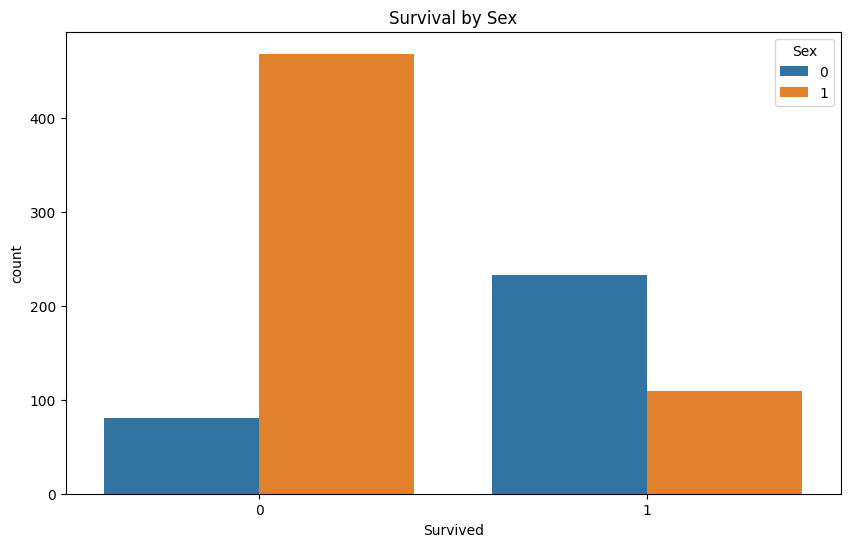

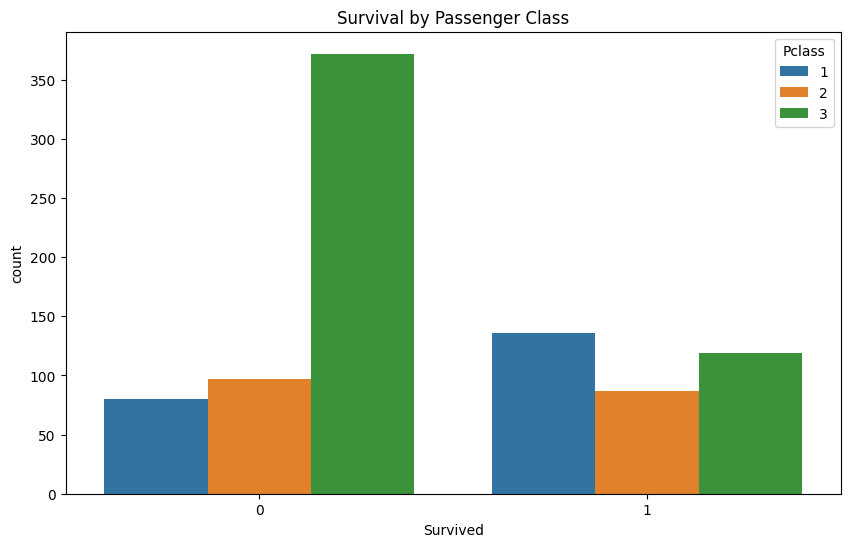

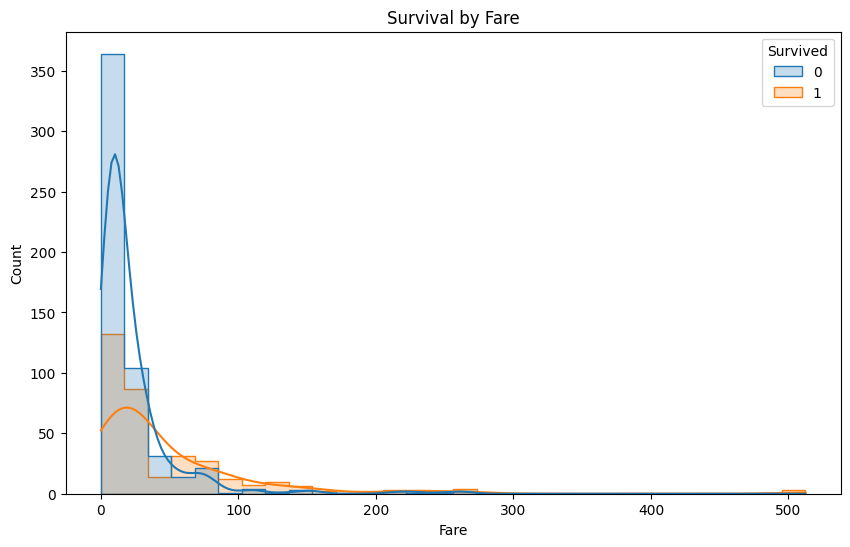

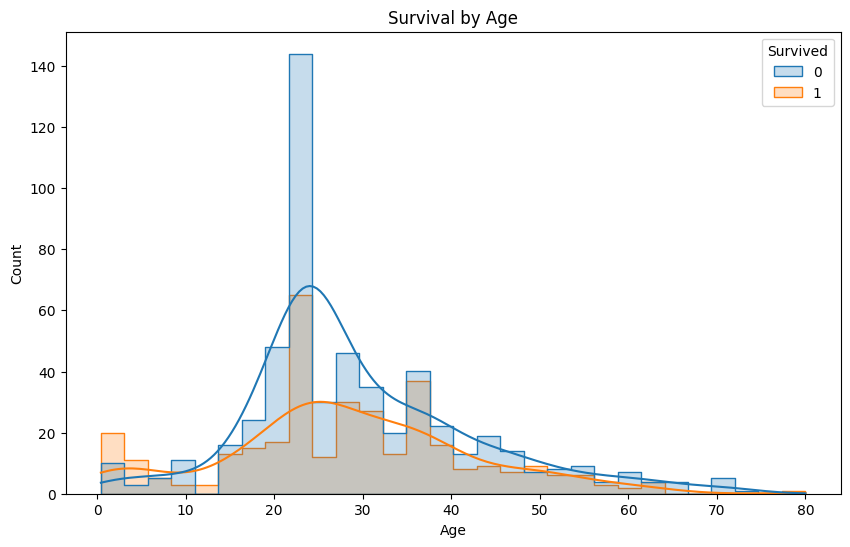

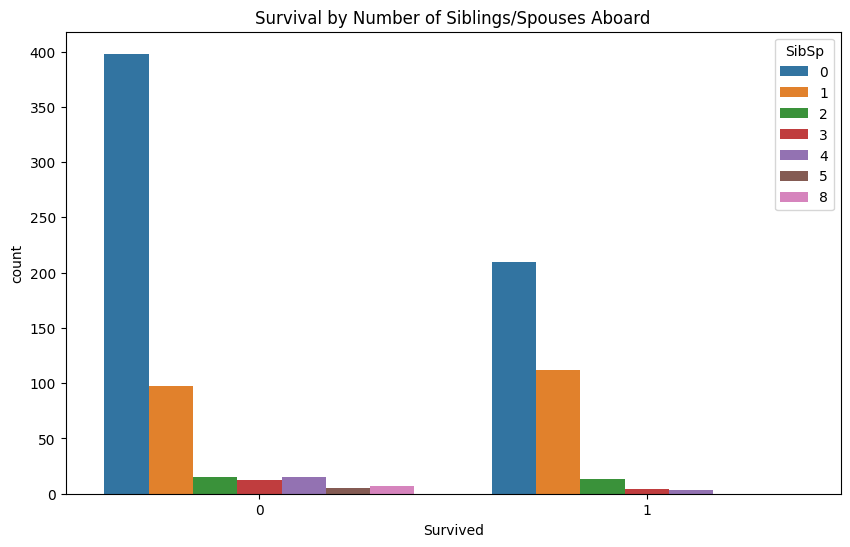

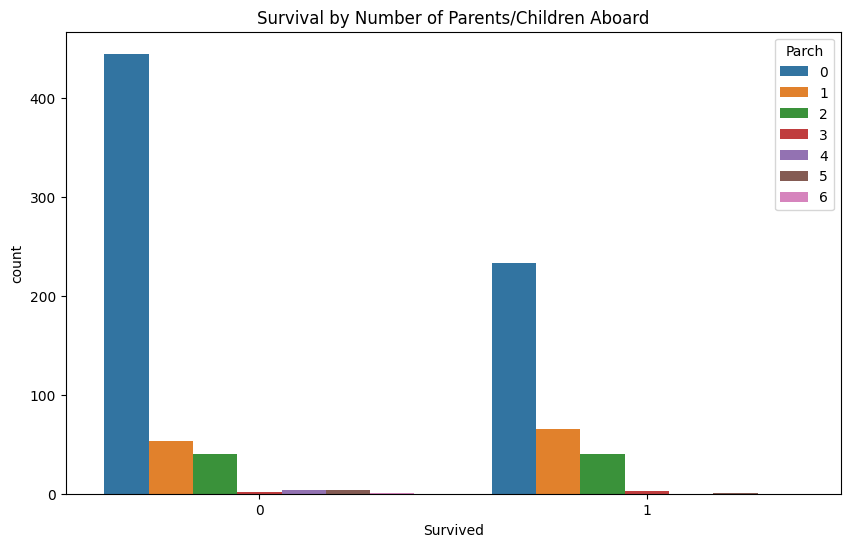

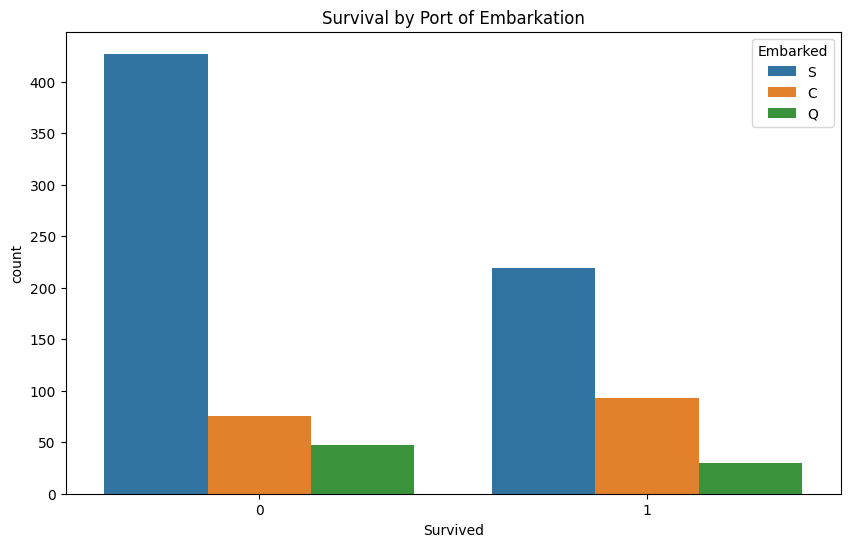

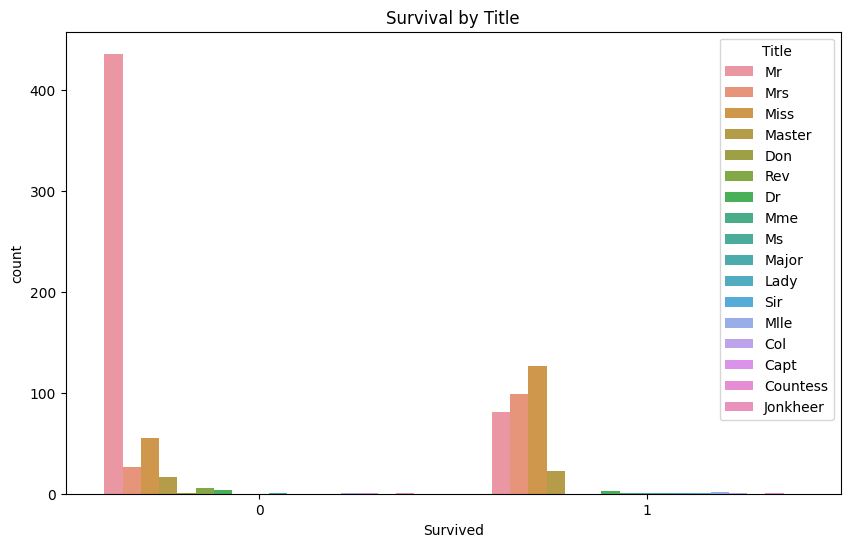

In [11]:
#Survival by sex
plt.figure(figsize=(10, 6))
sn.countplot(x='Survived', hue='Sex', data=train)
plt.title('Survival by Sex')
plt.show()

#Survival by Passenger class
plt.figure(figsize=(10, 6))
sn.countplot(x='Survived', hue='Pclass', data=train)
plt.title('Survival by Passenger Class')
plt.show()

#Survival by Fare
plt.figure(figsize=(10, 6))
sn.histplot(data=train, x="Fare", hue="Survived", kde=True, element="step", bins=30)
plt.title('Survival by Fare')
plt.show()

#Survival by Age
plt.figure(figsize=(10, 6))
sn.histplot(data=train, x="Age", hue="Survived", kde=True, element="step", bins=30)
plt.title('Survival by Age')
plt.show()

# Survival by Number of Siblings/Spouses Aboard 
plt.figure(figsize=(10, 6))
sn.countplot(x='Survived', hue='SibSp', data=train)
plt.title('Survival by Number of Siblings/Spouses Aboard')
plt.show()

# Survival by Number of Parents/Children Aboard 
plt.figure(figsize=(10, 6))
sn.countplot(x='Survived', hue='Parch', data=train)
plt.title('Survival by Number of Parents/Children Aboard')
plt.show()

# Survival by Port of Embarkation
plt.figure(figsize=(10, 6))
sn.countplot(x='Survived', hue='Embarked', data=train)
plt.title('Survival by Port of Embarkation')
plt.show()

# Survival by Title
plt.figure(figsize=(10, 6))
sn.countplot(x='Survived', hue='Title', data=train)
plt.title('Survival by Title')
plt.show()

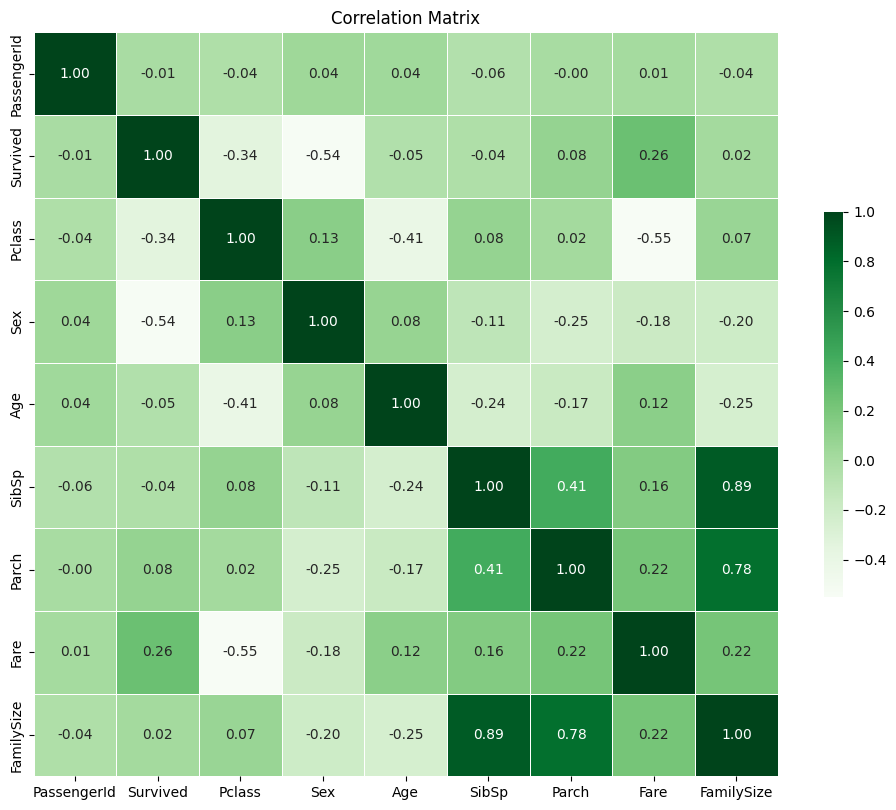

In [12]:
# Select only numerical columns for correlation calculation
numerical_train = train.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numerical_train.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the green color palette
sn.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Greens', square=True, cbar_kws={"shrink": .5}, linewidths=.5)

# Add title
plt.title('Correlation Matrix')

# Show plot
plt.show()

In [13]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(train['Title'], train['Survived'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print(f"Chi-squared Test P-value: {p}")

Chi-squared Test P-value: 2.5227682324660694e-54


# **Feature Engineering**

In [14]:
print('Title' in train.columns)  # Should return True if 'Title' exists in train
print('Title' in test.columns)   # Should return True if 'Title' exists in test


True
True


In [15]:
train = pd.get_dummies(train, columns=['Title'])
test = pd.get_dummies(test, columns=['Title'])

In [16]:
# Align the columns in the test set with the train set
test = test.reindex(columns=train.columns, fill_value=0)

In [17]:
# Feature Selection
features = ['Pclass', 'Sex', 'Age','Embarked']
X_train = train[features]
y_train = train['Survived']
X_test = test[features]

In [18]:
# Fill missing values in the original test DataFrame
test['Fare'].fillna(train['Fare'].median(), inplace=True)

# Then create X_test
X_test = test[features]


In [19]:
# One-hot encode 'Embarked' in both train and test datasets
train = pd.get_dummies(train, columns=['Embarked'])
test = pd.get_dummies(test, columns=['Embarked'])

# Ensure that both datasets have the same set of columns (important if test set has different categories)
test = test.reindex(columns=train.columns, fill_value=0)
test.drop(['Survived'], axis=1, inplace=True)

# Now update X_train and X_test
X_train = train.drop(['Survived'], axis=1)
X_test = test  # Assuming that 'Survived' is not a column in your test dataset


In [20]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


# Splitting the training data for validation purposes
X = train.drop('Survived', axis=1)
y = train['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model objects
rf_model = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=0)
lr_model = LogisticRegression(max_iter=10000)
gb_model = GradientBoostingClassifier()
nb_model = GaussianNB()
svc_model = SVC()

# Model training
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

# Predict on validation set
rf_predict = rf_model.predict(X_val)
lr_predict = lr_model.predict(X_val)
gb_predict = gb_model.predict(X_val)
nb_predict = nb_model.predict(X_val)
svc_predict = svc_model.predict(X_val)

# Accuracy on validation set
rf_score = rf_model.score(X_val, y_val)
lr_score = lr_model.score(X_val, y_val)
gb_score = gb_model.score(X_val, y_val)
nb_score = nb_model.score(X_val, y_val)
svc_score = svc_model.score(X_val, y_val)

print("Accuracy Scores on Validation Data:")
print("Random Forest: {:0.2f}%".format(rf_score * 100))
print("Logistic Regression: {:0.2f}%".format(lr_score * 100))
print("Gradient Boosting: {:0.2f}%".format(gb_score * 100))
print("Naive Bayes: {:0.2f}%".format(nb_score * 100))
print("Support Vector Classifier: {:0.2f}%".format(svc_score * 100))


Accuracy Scores on Validation Data:
Random Forest: 79.33%
Logistic Regression: 81.56%
Gradient Boosting: 81.01%
Naive Bayes: 70.95%
Support Vector Classifier: 59.78%


In [21]:
test_predictions = lr_model.predict(X_test)


In [22]:
# Create a submission DataFrame
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': test_predictions})

# Write the submission DataFrame to a CSV file
submission.to_csv('titanic_submission.csv', index=False)
